Accurecy:  1.0


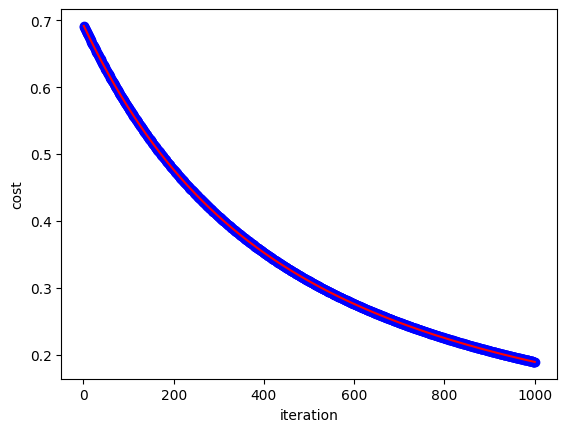

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

class LogisticRegression:

    def __init__(self, learning_rate: float = 0.01, lambda_ = 0, n_iters: int = 1000) -> None:
        '''
        Args:
            learning_rate: float
            n_iters: int
        '''
        # learning rate
        self.lr = learning_rate
        # regularization parameter
        self.lambda_ = lambda_
        # number of iterations to find the optimal paramaters or to train the model
        self.n_iters = n_iters
        # weights with inittial values
        self.weight = np.zeros(1)
        # bias with inittial values
        self.bias = 0.0
        # loss history 
        self.cost_hist = []

    
    def sigmoid(self, z: np.array) -> np.array:
        '''
        Args:
            x_train: ndarray (n, m) where n is number of samples and m is number of features
            y_train: ndarray (n,) where n is number of samples
        Returns:
            y_pred: ndarray (n,) where n is number of samples
        '''
        return np.divide(1, 1 + np.exp(-z)) 

    
    def compute_cost(self, X_train: np.array, y_train: np.array) -> float: 
        '''
        Args:
            x_train: ndarray (n, m) where n is number of samples and m is number of features
            y_train: ndarray (n,) where n is number of samples
        Returns:
            cost: float
        '''
        n, m = X_train.shape
        z = np.dot(X_train, self.weight) + self.bias
        y_pred = self.sigmoid(z)
        regularization = (self.lambda_ * np.sum(np.square(self.weight))) / (2 * n)
        loss = (-y_train * np.log(y_pred)) - ((1 - y_train) * np.log(1 - y_pred)) + regularization
        cost = np.mean(loss)

        return cost

    
    def compute_gradient(self, X_train: np.array, y_train: np.array) -> tuple:
        '''
        Args:
            x_train: ndarray (n, m) where n is number of samples and m is number of features
            y_train: ndarray (n,) where n is number of samples
        Returns:
            weight: ndarray (m,)
            bias: float
        '''
        n, m = X_train.shape 
        z = np.dot(X_train, self.weight) + self.bias
        y_pred = self.sigmoid(z)
        loss = y_pred - y_train 
        weight = np.dot(loss.reshape(-1, n), X_train) / n
        bias = np.mean(loss)

        return weight[0], bias

    
    def fit(self, X_train: np.array, y_train: np.array) -> None:
        '''
        Args:
            x_train: ndarray (n, m) where n is number of samples and m is number of features
            y_train: ndarray (n,) where n is number of samples
        '''
        n, m = X_train.shape
        # initalize weight
        self.weight = np.zeros(m)
        # training loop
        for i in range(self.n_iters):
            weight, bias =self.compute_gradient(X_train, y_train)
            # update and regularize parameters
            self.weight = self.weight * (1 - self.lr * self.lambda_ / n) - self.lr * weight
            self.bias -= self.lr * bias 
            cost = self.compute_cost(X_train, y_train)
            self.cost_hist.append(cost)

    
    def predict(self, X_test: np.array) -> np.array:
        '''
        Args:
            x_test: ndarray (n, m) where n is number of samples and m is number of features
        Returns:
            y_pred: ndarray (n,) where n is number of samples
        '''
        z = np.dot(X_test, self.weight) + self.bias
        y_pred = self.sigmoid(z)

        return np.where(y_pred <=0.5, 0, 1)

    
    def accurecy(self, y_pred: np.array, y_test: np.array) -> float:
        '''
        Args:
            y_pred: ndarray (n,) where n is number of samples
            y_test: ndarray (n,) where n is number of samples
        Returns:
            accurecy: float
        '''
        return np.mean(y_pred == y_test)

    
    def zscore_normalize_features(self, X_train: np.ndarray) -> tuple:
        '''
        Normalizes the features in x
        Args:
            x: ndarray (n, m) where n is number of samples and m is number of features
        Returns:
            x: ndarray (n, m) where n is number of samples and m is number of features
            mu: ndarray (m,) where m is number of features
            sigma: ndarray (m,) where m is number of features
        '''
        mu = X_train.mean(axis=0)
        sigma = X_train.std(axis=0)
        X_norm = (X_train - mu) / sigma

        return X_norm, mu, sigma



# data
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# model
n_iters = 1000
lr_model = LogisticRegression(learning_rate = 0.01, n_iters = n_iters)
# noramlize features
X_train, _, _ = lr_model.zscore_normalize_features(X_train)
# train the model
lr_model.fit(X_train, y_train)
# predict
y_pred = lr_model.predict(X_train)
print("Accurecy: ", lr_model.accurecy(y_pred, y_train))
plt.scatter(np.arange(1, n_iters + 1), lr_model.cost_hist, c='b')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.plot(np.arange(1, n_iters + 1),lr_model.cost_hist, c='r')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=39a136b1-8191-420f-afab-bb238316f4d7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>